# Analysis

In [1]:
# import libraries
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Import Data

In [2]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

#### Merging Weather and Coffee Production Data

To analyze the relationship between weather conditions and coffee production, we merge the weather and coffee datasets using the common columns year and subdivision.

In [3]:
#  Merge these two dataframes together

merged_df = pd.merge(weather, coffee, on = ['year','subdivision'])

This merge combines both datasets into a single DataFrame (merged_df), aligning weather metrics with coffee production data for the same year and region. 

##  Exploratory Data Analysis

#### Previewing the merged dataset

In [5]:
merged_df.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0


#### Basic information about the dataset and data types

In [6]:
merged_df.shape

(18, 19)

In [7]:
merged_df.columns

Index(['year', 'rain_max', 'temp_avg', 'temp_max', 'temp_min', 'hum_max',
       'hum_min', 'wind_max', 'wind_avg', 'subdivision', 'country', 'type',
       '60kgs_bag', 'nonbearing_trees', 'bearing_trees', 'nonbear_hectares',
       'bearing_hectares', 'bearing_trees_per_hectare',
       'nonbearing_trees_per_hectare'],
      dtype='object')

In [8]:
merged_df.dtypes

year                              int64
rain_max                        float64
temp_avg                        float64
temp_max                        float64
temp_min                        float64
hum_max                         float64
hum_min                         float64
wind_max                        float64
wind_avg                        float64
subdivision                      object
country                          object
type                             object
60kgs_bag                       float64
nonbearing_trees                float64
bearing_trees                   float64
nonbear_hectares                float64
bearing_hectares                float64
bearing_trees_per_hectare       float64
nonbearing_trees_per_hectare    float64
dtype: object

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          18 non-null     int64  
 1   rain_max                      18 non-null     float64
 2   temp_avg                      18 non-null     float64
 3   temp_max                      18 non-null     float64
 4   temp_min                      18 non-null     float64
 5   hum_max                       18 non-null     float64
 6   hum_min                       18 non-null     float64
 7   wind_max                      18 non-null     float64
 8   wind_avg                      18 non-null     float64
 9   subdivision                   18 non-null     object 
 10  country                       18 non-null     object 
 11  type                          18 non-null     object 
 12  60kgs_bag                     18 non-null     float64
 13  nonbear

Merged dataset contains 18 rows and 19 columns, with majority dtypes as float.

#### Handling Missing Values & Duplicates

In [10]:
# Checking null values 

merged_df.isnull().sum()

year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision                     0
country                         0
type                            0
60kgs_bag                       0
nonbearing_trees                1
bearing_trees                   1
nonbear_hectares                1
bearing_hectares                1
bearing_trees_per_hectare       1
nonbearing_trees_per_hectare    1
dtype: int64

Upon inspection, several columns, such as nonbearing_trees, bearing_trees, nonbear_hectares, bearing_hectares, bearing_trees_per_hectare, and nonbearing_trees_per_hectare were found to have one missing value each.



In [11]:
# Drop null values

merged_df.dropna(inplace=True)

In [13]:
# checking
merged_df.isnull().sum()

year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision                     0
country                         0
type                            0
60kgs_bag                       0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

After dropping the null values, the dataset is now fully complete with no missing entries, and ready for reliable analysis.

#### Duplicate check

In [14]:
merged_df.duplicated().sum()

np.int64(0)

The result shows 0 duplicate rows, confirming that all entries in the dataset are unique. No further action is needed for deduplication.

#### Summary Statistics

In [16]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17.0,2014.294118,5.428682,2006.000000,2010.000000,2014.000000,2019.000000,2023.000000
rain_max,17.0,3.152000,1.223142,1.617582,2.255738,2.876923,3.769231,6.670968
temp_avg,17.0,21.283485,0.566301,20.682400,20.959536,21.088660,21.444293,23.040999
temp_max,17.0,28.171186,0.569878,27.000000,27.769231,28.406011,28.580769,29.010989
temp_min,17.0,16.475243,0.915580,15.268681,16.003279,16.321311,16.475275,18.753125
hum_max,17.0,96.397840,2.373703,87.837500,96.060440,97.049451,97.450549,98.500000
hum_min,17.0,48.615141,3.079306,44.648352,47.475410,48.493750,49.329670,57.806452
wind_max,17.0,8.484942,0.626471,7.484426,7.898352,8.549451,8.974176,9.706452
wind_avg,17.0,1.308954,0.399985,0.812202,0.929144,1.238874,1.557709,2.075207
60kgs_bag,17.0,26.429412,5.191461,16.300000,23.700000,26.000000,29.100000,34.800000


Key observations:

- Coffee production (60kgs_bag) ranges from 16.3 to 34.8, with an average of 26.43.
- The number of bearing trees is consistently high, averaging 5789.41.
- The average temperature remains steady around 21.28°C
- Maximum rainfall varies widely, from 1.62 to 6.67, making it the most inconsistent weather factor in the dataset.

## Reflections

#### Correlation Between Avg Temp and Coffee Bags 

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

To investigate the potential impact of temperature on coffee yield, we calculate the correlation between temp_avg (average temperature) and 60kgs_bag (coffee production).

In [17]:
# finding correlation
merged_df[['temp_avg','60kgs_bag']].corr()

,temp_avg,60kgs_bag
temp_avg,1.000000,-0.124772
60kgs_bag,-0.124772,1.000000


To visualise how Avg Temp may influence coffee yield, we plot a scatterplot using the temp_avg and 60kgs_bag columns.

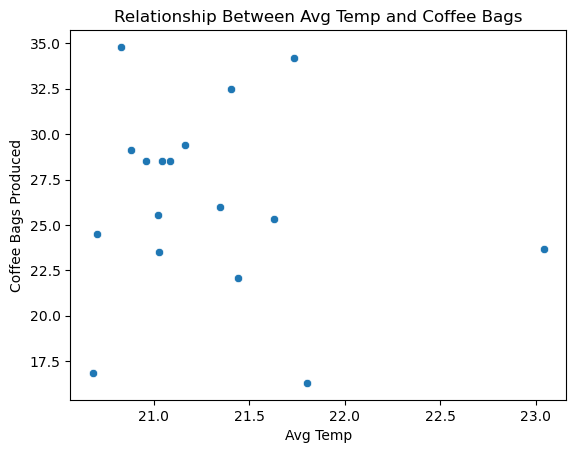

In [18]:
# plotting scatter plot
sns.scatterplot(x = merged_df['temp_avg'],y = merged_df['60kgs_bag'])

plt.title('Relationship Between Avg Temp and Coffee Bags')
plt.xlabel('Avg Temp')
plt.ylabel('Coffee Bags Produced')
plt.show()

Answer:

The Pearson's correlation coefficient of -0.124772 indicates a very weak negative relationship between average temperature and coffee production (60kgs_bag).
The scatter plot shows a weak and scattered distribution of data points, with no clear upward or downward trend. ie,  there is no linear relationship between average temperature and coffee production in this data. 





__________________

#### Correlation between Minimum Humidity and Coffee bag

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

In [20]:
# finding correlation
merged_df[['hum_min','60kgs_bag']].corr()

,hum_min,60kgs_bag
hum_min,1.000000,-0.540171
60kgs_bag,-0.540171,1.000000


To explore how minimum humidity may influence coffee yield, we plot a scatterplot using the hum_min and 60kgs_bag columns.

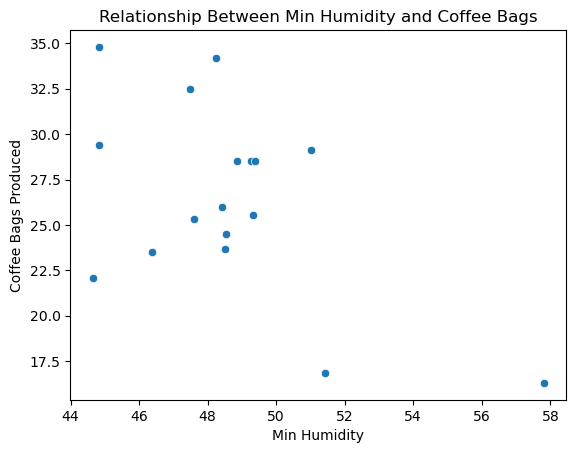

In [24]:
# plotting scatter plot
sns.scatterplot(x = merged_df['hum_min'],y = merged_df['60kgs_bag'])


plt.title('Relationship Between Min Humidity and Coffee Bags')
plt.xlabel('Min Humidity')
plt.ylabel('Coffee Bags Produced')
plt.show()

Answer:

The Pearson correlation coefficient of -0.54 indicates a moderate negative linear relationship between minimum humidity (hum_min) and coffee production (60kgs_bag).
The plot shows a somewhat downward trend, though not perfectly linear.
ie, There is a moderate inverse correlation between minimum humidity and coffee yield. Higher minimum humidity may be associated with reduced coffee production.


_______________________

#### Correlation between Max Rain and Coffee bags 

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

To examine the effect of rainfall on coffee yield, we compute the correlation between rain_max (maximum rainfall) and 60kgs_bag (coffee production).

In [25]:
# finding correlation
merged_df[['rain_max','60kgs_bag']].corr()


,rain_max,60kgs_bag
rain_max,1.000000,-0.395811
60kgs_bag,-0.395811,1.000000


To visualize how rainfall may influence coffee yield, we plot a scatterplot using the rain_max and 60kgs_bag columns.

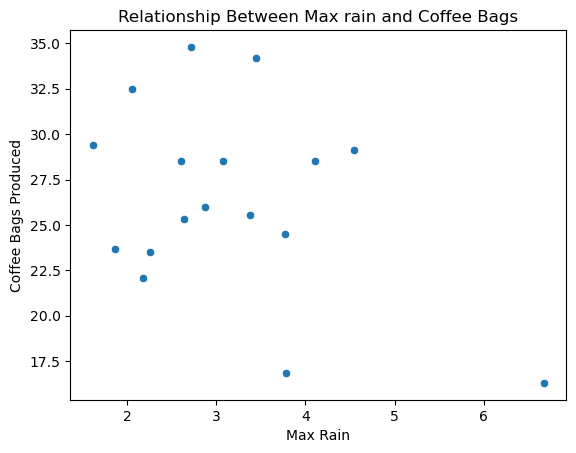

In [26]:
# plotting Scatter plot
sns.scatterplot(x= merged_df['rain_max'], y = merged_df['60kgs_bag'])

plt.title('Relationship Between Max rain and Coffee Bags')
plt.xlabel('Max Rain')
plt.ylabel('Coffee Bags Produced')
plt.show()

Answer:
The Pearson's correlation coefficient of -0.395811 indicates a weak to moderate negative linear relationship between maximum rainfall (rain_max) and coffee production (60kgs_bag).
The scatter plot suggests a mild downward trend, with some dispersion in the data points. As expected, there is a negative correlation between maximum rainfall and coffee output.

________________

#### Correlation between Avg wind and Coffee Bags columns 

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.



To examine the effect of wind on coffee yield, we compute the correlation between wind_avg and 60kgs_bag (coffee production).

In [ ]:
# finding correlation
merged_df[['wind_avg','60kgs_bag']].corr()

,wind_avg,60kgs_bag
wind_avg,1.000000,-0.707327
60kgs_bag,-0.707327,1.000000


To visualize how avg wind may influence coffee yield, we plot a scatterplot using the wind_avg and 60kgs_bag columns.

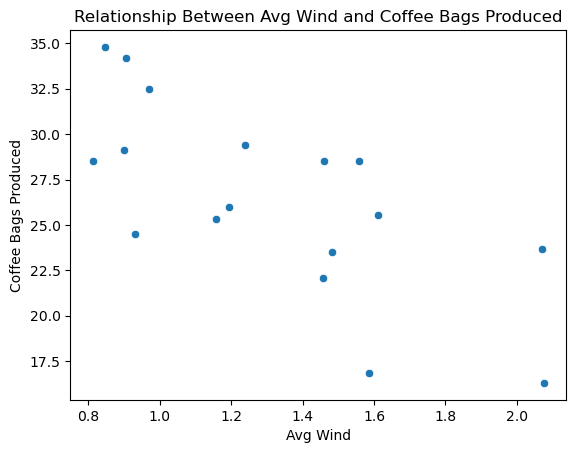

In [30]:
# scatter plot
sns.scatterplot(x= merged_df['wind_avg'], y = merged_df['60kgs_bag'])

plt.title('Relationship Between Avg Wind and Coffee Bags Produced')
plt.xlabel('Avg Wind')
plt.ylabel('Coffee Bags Produced')
plt.show()

Answer:

There is a strong negative linear relationship between avg wind and coffee output (-0.707), implying that higher wind speeds are generally associated with reduced 60kgs_bag quantities.
The scatter plot supports this, showing a general downward trend in coffee productions as avg wind increases, though with some dispersion.

________________

## Bivariate Analysis 

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?



In [31]:
# checking weather data columns
merged_df[['temp_avg', 'hum_min', 'rain_max', 'wind_avg']]

,temp_avg,hum_min,rain_max,wind_avg
0,21.803087,57.806452,6.670968,2.075207
1,23.040999,48.493750,1.866250,2.069605
2,20.682400,51.415301,3.777049,1.584408
3,21.023802,49.329670,3.380220,1.611746
4,21.444293,44.648352,2.183516,1.455907
5,20.959536,49.252747,2.601786,1.557709
6,21.030624,46.366120,2.255738,1.483515
7,21.088660,49.390110,3.079121,1.459356
8,21.163462,44.824176,1.617582,1.238874
9,21.346828,48.406593,2.876923,1.193435


In [35]:
# checking coffee data columns
merged_df[['60kgs_bag', 'nonbearing_trees', 'bearing_trees', 'nonbear_hectares',
       'bearing_hectares', 'bearing_trees_per_hectare',
       'nonbearing_trees_per_hectare']]

,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0
5,28.50,815.0,5820.0,234.0,2175.0,2676.0,3483.0
6,23.50,835.0,5760.0,260.0,2150.0,2679.0,3212.0
7,28.50,1000.0,5860.0,282.0,2105.0,2784.0,3546.0
8,29.40,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
9,26.00,1185.0,5770.0,347.0,2090.0,2761.0,3415.0


#### Correlation Between Weather Variables and Bearing Trees

To explore potential relationships between weather conditions and coffee tree productivity, we compute a correlation matrix using selected features: temp_avg, hum_min, rain_max, wind_avg, and bearing_trees.

In [49]:
# Compute correlation matrix
corr_matrix = merged_df[['temp_avg', 'hum_min', 'rain_max', 'wind_avg','bearing_trees']].corr()


We then visualize this matrix using a heatmap:

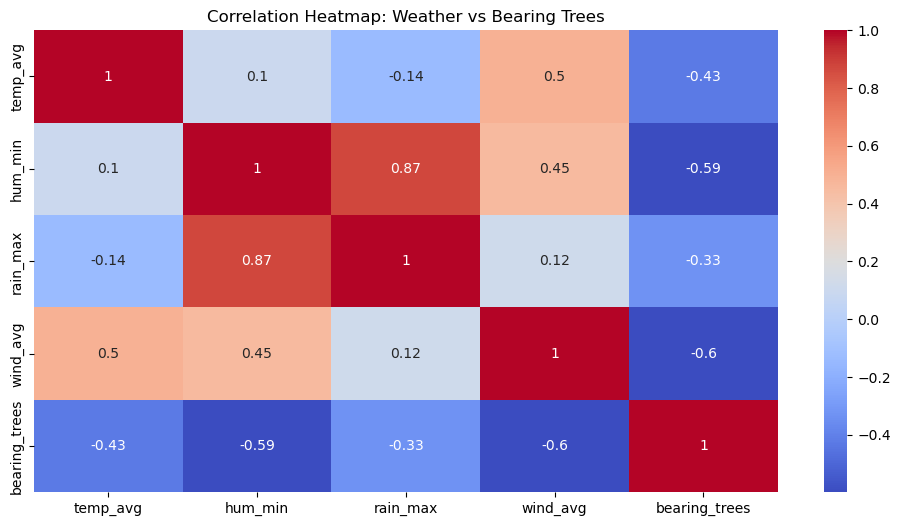

In [50]:
# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Weather vs Bearing Trees")
plt.show()


Answer :

temp_avg (-0.43)  --- Average Temp shows a weak-moderate negative correlation.

hum_min (-0.59)  --- Minimum humidity shows a moderate to strong negative relationship.

rain_max (-0.33)  --- Rainfall has a weaker negative correlation.

wind_avg (-0.60)  --- There is a strong negative correlation between average wind speed and the number of bearing trees. This means that strong winds can harm coffee trees, possibly by breaking branches, shaking the roots, or putting too much pressure on the plants


ie,All weather variables show a negative correlation with bearing_trees, but avg wind stands out with a very strong inverse relationship, suggesting it's the most critical factor to monitor.

___________________________

Which weather factor seems to influence coffee production the most? 

#### Correlation Between Weather Variables and Coffee Productions

To explore potential relationships between weather conditions and coffee productions, we compute a correlation matrix using selected features: temp_avg, hum_min, rain_max, wind_avg, and 60kgs_bag.

In [51]:
# Compute correlation matrix
corr_matrix = merged_df[['temp_avg', 'hum_min', 'rain_max', 'wind_avg','60kgs_bag']].corr()


We then visualize this matrix using a heatmap:

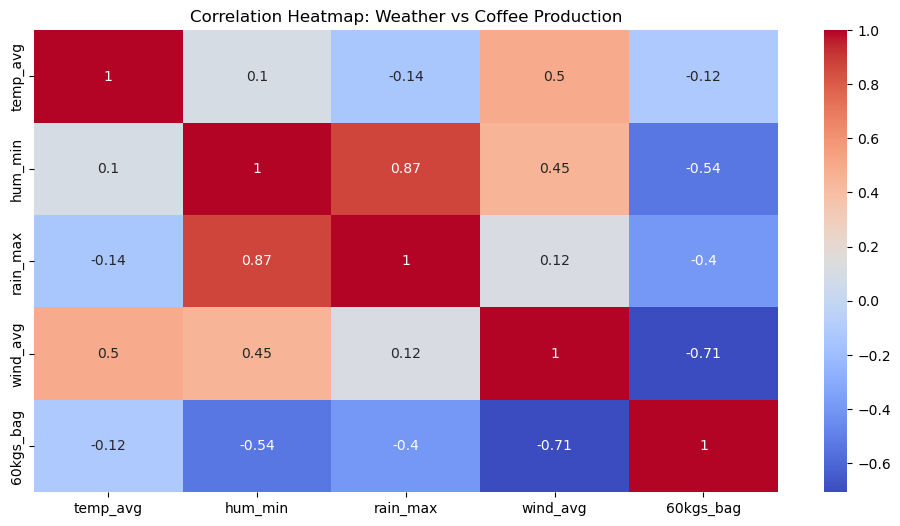

In [52]:
# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Weather vs Coffee Production")
plt.show()


Avg wind seems to influence coffee production the most, since corr is -0.71. It shows a very strong negative correlation, as average wind speed increases, coffee production decreases. This suggests wind is a major limiting factor for coffee production.

_______________

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?


>* To further explore the impacts of weather and economic forces on coffee production, I would collect data on solar radiation, soil quality, irrigation practices, water availability, planting density, and tree age distribution, as these directly affect crop growth. Economically, I’d gather information on market prices, input costs, subsidies or incentives, labor availability and wages, export volumes and prices, and transportation, as these factors influence production decisions and profitability.*

_____________

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?





> * From the above data analysis, the most favorable conditions for coffee growing include low wind speeds, moderate humidity, mild temperatures, and balanced rainfall. Wind stands out as the most harmful factor, showing strong negative correlations with yield (60kgs_bag). This means that protecting coffee plants from strong winds, through windbreaks or natural barriers, should be a top priority. Additionally, managing humidity and avoiding temperature extremes can help reduce disease risk and maintain tree health. Overall, focusing on these environmental factors can lead to healthier plantations and improved coffee productivity.  




__________________________